# 1D Softmax Position-Velocity Model

- Read in data from 1D generated shot data
- Train on it
- Visualize

### Load Data

In [29]:
%store -r data_points_1d

sideways = data_points_1d.T

X, Y = np.array(sideways[:2]).astype(float), np.array(sideways[2:]).astype(int)

### Train

In [30]:
from softmax import Softmax, Model

sm = Softmax(X, Y, C=2, learning_rate=.1, regularizer=0.01, gradient_checking=False, inspect=True)

def states(iters):
    for _ in range(iters):
        sm.learn()
        yield sm.info
        
states = list(states(5000))

### Visualize

Notice the plots are linear because of the following recurrence relation:

$$v_t = x_{t+1} - x_t$$

This formula follows by definition of $x_t$:

$$x_t = x_{t-1} + v_{t-1}$$

Intuitively, as the difference between $x$ points gets smaller, the difference between $y$ points get smaller **by the same amount**

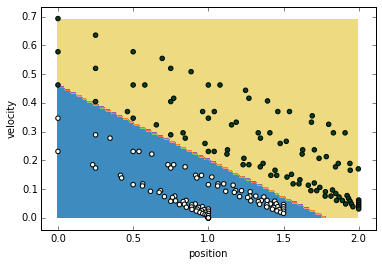

In [31]:
from ipywidgets import interact, fixed

@interact(X=fixed(X), Y=fixed(Y), view_index=(0, len(states)-1), states=fixed(states))
def plot(X, Y, view_index, states):
    """View decision boundary over time
    
    We have the state of the model (i.e. its parameters) after every time step.
    We want to see how the model learns over time. Hence create a one-off instance
    of a softmax with its old parameters and ask it to make a bunch of predictions!
    """
    s = states[view_index]
    sm = Softmax(X=X, ys_train=Y, C=2, W=s.W, b=s.b)
    
    # Plotting
    xmin = ymin = 0
    xmax, ymax = 2, .7
    step = 0.01
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step), np.arange(ymin, ymax, step))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots()
    Z = sm.predict(np.c_[xx.ravel(), yy.ravel()].T)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    ax.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Greens)
    
    plt.xlabel('position')
    plt.ylabel('velocity')

### Plot Losses

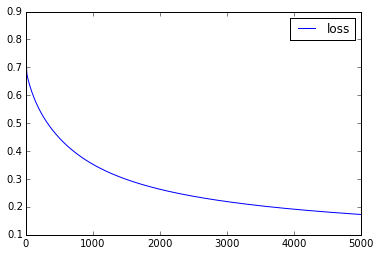

In [32]:
def loss_averages():
    for state in states:
        yield state.loss.mean()
        
loss_avgs = list(loss_averages())

pd.DataFrame(loss_avgs, columns=['loss']).plot()